<a href="https://colab.research.google.com/github/Gabrielhlc/PLN_Analisador_Curriculos/blob/final/Projeto_PLN_Avaliacao_Vagas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações e Bibliotecas

In [1]:
!pip install docling --no-warn-conflicts
!pip install transformers sentencepiece
!pip install langchain langchain-community sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.3/164.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 36.7 MB/s eta 0:00:00
   ━━━

Instalação local da LLM usada como motor de busca para o RAG (LLaMa)

In [2]:
!curl -fsSL https://ollama.com/install.sh | sh

# inicia o servidor em background
!nohup ollama serve > /dev/null 2>&1 &

!ollama pull llama3.1:8b

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.



# Descompactação de Zip e Extração dos PDFs para markdown

### Função de descompactação

In [3]:
import zipfile
import os
import shutil
from docling.document_converter import DocumentConverter

import os
import zipfile
import shutil

def processar_zip(zip_path="curriculos.zip", output_folder="curriculosMD"):
    """
    Lê um zip com PDFs, converte cada PDF para markdown usando Docling, salva na pasta output_folder
    e retorna um dicionário {nome_arquivo: conteúdo_markdown}.
    """
    os.makedirs(output_folder, exist_ok=True)
    converter = DocumentConverter()
    curriculos_md = {}
    cid_para_arquivo_map = {}


    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        arquivos_pdf = [f for f in zip_ref.namelist() if not f.endswith("/") and f.lower().endswith('.pdf')]

        for idx, file_name in enumerate(arquivos_pdf):
            cid = f"curr_{idx}"
            original_filename = os.path.basename(file_name)
            print(original_filename)
            cid_para_arquivo_map[cid] = original_filename

            if file_name.endswith("/"):
                continue

            extracted_path = zip_ref.extract(file_name)
            base_name = os.path.splitext(os.path.basename(file_name))[0]
            md_path = os.path.join(output_folder, f"{base_name}.md")

            try:
                doc = converter.convert(extracted_path).document
                markdown_content = doc.export_to_markdown()

                # Salvar arquivo markdown
                with open(md_path, 'w', encoding='utf-8') as md_file:
                    md_file.write(markdown_content)

                curriculos_md[base_name] = markdown_content
            except Exception as e:
                print(f"Erro ao converter {file_name}: {e}")

            os.remove(extracted_path)

    temp_dirs = ["curriculos", "tmp", "temp"]
    for temp_dir in temp_dirs:
        if os.path.exists(temp_dir):
            shutil.rmtree(temp_dir)

    print(f"Todos os arquivos foram processados e salvos em '{output_folder}'.")
    return curriculos_md, cid_para_arquivo_map

Execução da função de descompactação

In [4]:
zip_path = "curriculos.zip"
curriculos, cid_arquivo_map = processar_zip(zip_path)

print(f"Total processados: {len(curriculos)}")

Lucas Torres.pdf


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Gustavo Sousa.pdf
Mariana Ribeiro.pdf
Débora Rocha.pdf
Ulisses Dias.pdf
Talita Oliveira.pdf
Sofia Brito.pdf
Mariana Barbosa.pdf
Íris Pinto.pdf
Ulisses Melo.pdf
Íris Vaz.pdf
Júlia Moura.pdf
Mônica Gomes.pdf
Mônica Azevedo.pdf
Vitor Gomes.pdf
Mônica Rocha.pdf
Karina Freitas.pdf
João Costa.pdf
Amanda Silva.pdf
Talita Araújo.pdf
Vitor Machado.pdf
Yasmin Freitas.pdf
Wilson Ramos.pdf
Sofia Pinto.pdf
Sandra Sousa.pdf
Patrícia Barros.pdf
Otávio Azevedo.pdf
Hugo Monteiro.pdf
Hugo Santos.pdf
Rafael Melo.pdf
Eduardo Sousa.pdf
Otávio Silva.pdf
Hugo Dias.pdf
Débora Dias.pdf
Carlos Souza.pdf
Bruno Carvalho.pdf
Beatriz Costa.pdf
Valentina Melo.pdf
Júlia Brito.pdf
Leandro Silva.pdf
Carlos Teixeira.pdf
Renato Silva.pdf
Fernanda Machado.pdf
Helena Lima.pdf
Gustavo Almeida.pdf
Gustavo Freitas.pdf
Eduardo Barbosa.pdf
Íris Melo.pdf
Carlos Gomes.pdf
Sandra Melo.pdf
Sofia Cavalcante.pdf
Karina Monteiro.pdf
Daniela Rocha.pdf
Fernanda Pereira.pdf
Rafael Azevedo.pdf
Sandra Dias.pdf
Carlos Machado.pdf
Amanda Bri

# Preencha os detalhes de requisitos da vaga aqui.

In [5]:
# Divida os valores estritamente por vírgula.
# Insira somente os valores para cargo, habilidades e idiomas
input_rh = {
  "cargo": "Desenvolvedor Mobile",
  "habilidades": "Kotlin, React Native, JavaScript, Scrum",
  "idiomas": "Português, Espanhol"
}

# Sumarização (RAG)

Inicialização do motor de busca

In [6]:
import getpass
from google.colab import userdata

import os
import google.generativeai as genai
from langchain_community.chat_models import ChatOllama


from langchain.chat_models import init_chat_model

SYSTEM_INSTRUCTION = (
  "Atuar como extrator de informações de currículos em PT-BR."
  "Usar SOMENTE o conteúdo do contexto recuperado."
  "Ser objetivo e citar apenas fatos presentes no contexto."
  "Em caso de ausência, retornar [] (array vazio)."
  "NÃO inferir por padrão (ex.: não assumir 'inglês' por ter trabalhado com empresa dos EUA)."
  "NÃO confundir 'linguagens de programação' com 'idiomas falados'."
  "NÃO inventar nomes, empresas, datas ou níveis."
  "Responder EXCLUSIVAMENTE em JSON válido, sem texto extra."
)

# Instancia o modelo
llm = ChatOllama(
    model="llama3.1:8b",
    base_url="http://localhost:11434",
    system_instruction=SYSTEM_INSTRUCTION
)

/tmp/ipython-input-3337361684.py:23: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(


Criação do banco vetorial

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import InMemoryVectorStore
from langchain_community.embeddings import HuggingFaceEmbeddings
import json, re
from typing import List, Dict, Tuple

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

def criar_banco_vetorial(
    curriculos_markdown: List[str],
    embedding_model: HuggingFaceEmbeddings,
    chunk_size: int = 200,
    chunk_overlap: int = 50,
) -> Tuple[InMemoryVectorStore, Dict[str, List[str]]]:
    """
    Recebe lista de currículos em markdown.
    Retorna: (vectorstore, chunks_map) onde chunks_map[source_id] = [chunks...]
    """
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )

    print(f"curriculos_markdown '{curriculos_markdown}")

    texts = []
    metadatas = []
    chunks_map = {}

    for idx, texto in enumerate(curriculos_markdown):
        source_id = f"curr_{idx}"
        chunks = splitter.split_text(curriculos_markdown[texto])
        chunks_map[source_id] = chunks
        # print(f"CHUNKS: '{chunks}")
        for c in chunks:
            texts.append(c)
            metadatas.append({"source": source_id})


    vectorstore = InMemoryVectorStore.from_texts(
        texts=texts,
        embedding=embedding_model,
        metadatas=metadatas
    )

    return vectorstore, chunks_map


/tmp/ipython-input-1282403355.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")


Busca dos valores no currículo

In [8]:
def parse_to_list(text: str) -> List[str]:
    text = text.strip()
    # tenta JSON primeiro
    try:
        obj = json.loads(text)
        if isinstance(obj, list):
            return [str(x).strip() for x in obj]
        # se for dict, pega valores planos
        if isinstance(obj, dict):
            # junta todas strings internas num array
            vals = []
            for v in obj.values():
                if isinstance(v, list):
                    vals.extend([str(x).strip() for x in v])
                else:
                    vals.append(str(v).strip())
            return vals
    except Exception:
        pass

    # heurística: linhas em forma de bullet
    lines = [l.strip() for l in text.splitlines() if l.strip()]
    bullets = []
    for l in lines:
        m = re.match(r"^[-–•\*]\s*(.+)", l)
        if m:
            bullets.append(m.group(1).strip())
    if bullets:
        return bullets

    # heurística: vírgula-separado
    if "," in text:
        parts = [p.strip() for p in re.split(r",|\|", text) if p.strip()]
        if parts:
            return parts

    # fallback: todo o texto como 1 item (se curto), ou vazio
    if len(text) > 0 and len(text.split()) <= 6:
        return [text]
    return []

def analisar_curriculo(
    vectorstore: InMemoryVectorStore,
    chunks_map: Dict[str, List[str]],
    curriculo_id: str,
    k: int = 8,
    top_k_retrieval: int = 100,
) -> Dict[str, List[str]]:
    """
    Retorna {'habilidades': [...], 'idiomas': [...] } para o curriculo_id.
    curriculo_id deve existir em chunks_map (ex: "curr_0").
    """
    if curriculo_id not in chunks_map:
        raise ValueError("curriculo_id não encontrado em chunks_map")

    perguntas = {
      "habilidades": (
        "Extrair apenas habilidades técnicas (tecnologias, ferramentas, linguagens de programação, frameworks) "
        "mencionadas literalmente no contexto. "
        "Ignorar soft skills genéricas (ex.: 'comunicação', 'trabalho em equipe') a menos que estejam em uma seção de 'Habilidades' "
        "ou listadas como requisito técnico. "
        "Retornar um array JSON de strings normalizadas (ex.: 'Python', 'SQL', 'TensorFlow'). "
        "Deduplicar mantendo capitalização canônica (ex.: 'Node.js', 'React', 'PostgreSQL'). "
        "Se não houver, responder []."
      ),

      "idiomas": (
        "Extrair apenas IDIOMAS FALADOS/ESCRITOS humanos (ex.: 'Português', 'Inglês', 'Espanhol', 'Francês', 'Alemão', 'Italiano', "
        "'Mandarim', 'Japonês'). "
        "Usar a seguinte WHITELIST e mapeamentos: "
        "  - Portugues|Português|Pt-BR -> 'Português' "
        "  - Ingles|Inglês|English -> 'Inglês' "
        "  - Espanhol|Castelhano|Spanish -> 'Espanhol' "
        "  - Frances|Francês|French -> 'Francês' "
        "  - Alemao|Alemão|German -> 'Alemão' "
        "  - Italiano|Italian -> 'Italiano' "
        "  - Mandarim|Chinês (quando se referir a idioma) -> 'Mandarim' "
        "  - Japones|Japonês -> 'Japonês' "
        "Permitir também: 'Russo', 'Árabe', 'Hindi', 'Coreano'. "
        "Ignorar TUDO que não for idioma humano (ex.: 'Java', 'Python', 'SQL', 'HTML', 'CSS', 'React', 'Node.js'). "
        "Ignorar países/cidades/cidadania (ex.: 'Brasileiro', 'São Paulo'). "
        "Aceitar níveis quando aparecerem, mas NÃO os incluir na resposta (ex.: 'Inglês avançado' -> 'Inglês'). "
        "Retornar um array JSON de idiomas padronizados conforme mapeamento. "
        "Se não houver, responder []."
      ),

      "cargo": (
            "Extrair apenas o cargo atual ou mais recente ocupado pelo candidato (ex.: 'Desenvolvedor Back-end', 'Analista de Dados', "
            "'Engenheiro de Software', 'Estagiário de TI'). "
            "Ignorar cargos de vagas desejadas, objetivos profissionais ou experiências muito antigas quando não estiver claro. "
            "Priorizar expressões como 'Cargo atual', 'Posição atual', 'Desde', 'Atualmente', 'Empregado como'. "
            "Retornar um array JSON de strings (mesmo que contenha apenas um cargo). "
            "Se não houver informação, responder []."
      )
    }

    saida = {}
    for chave, pergunta in perguntas.items():
        retrieved = vectorstore.similarity_search(pergunta, k=top_k_retrieval)
        relevant = [d for d in retrieved if d.metadata.get("source") == curriculo_id]

        if len(relevant) >= k:
            contexto_chunks = [d.page_content for d in relevant[:k]]
        else:
            contexto_chunks = chunks_map[curriculo_id][:k]

        contexto = "\n\n".join(contexto_chunks)

        system_msg = (
            "Você é um assistente de RH que extrai informações de currículos. "
            "Responda APENAS com um JSON array válido (ex: [\"Java\", \"Spring\"]) "
            "correspondente à pergunta. Se não houver itens, retorne []."
        )
        user_msg = (
            f"Contexto (trechos do currículo):\n{contexto}\n\n"
            f"Pergunta: {pergunta}\n\n"
        )

        response = llm.invoke([
            {"role": "system", "content": system_msg},
            {"role": "user", "content": user_msg}
        ])

        text = response.content.strip()
        parsed = parse_to_list(text)
        saida[chave] = parsed

    return saida

Execução do RAG

In [9]:
vectorstore, chunks_map = criar_banco_vetorial(curriculos, embedding_model)


curriculos_analisados = {}

print("Iniciando a análise dos currículos...")
for i in range(len(curriculos)):
    cid = f"curr_{i}"
    print(f"\nAnalisando currículo: {cid}")

    try:
        resultado = analisar_curriculo(
            vectorstore,
            chunks_map,
            curriculo_id=cid
        )
        curriculos_analisados[cid] = resultado
        print(f"Resultado para {cid}: {resultado}")
    except Exception as e:
        print(f"Erro ao analisar {cid}: {e}")

print("\nAnálise concluída.")
print(curriculos_analisados)

curriculos_markdown '{'Lucas Torres': '## Lucas Torres\n\nData de Nascimento: 11/05/1999 Endereço: Brasília, MG\n\n## Contato:\n\n- E-mail: lucas@exemplo.com - Telefone: (83) 95526-1166\n\n## Objetivo\n\nAtuar como Cientista de Dados em empresas de tecnologia, contribuindo com minhas habilidades técnicas e experiência para o desenvolvimento de soluções inovadoras.\n\n## Resumo Profissional\n\nProfissional com experiência de mais de 6 anos na área de tecnologia da informação, com atuação em projetos de diferentes segmentos. Possuo forte conhecimento em Python, Pandas, Scikit-learn e TensorFlow. Tenho facilidade em trabalhar em equipe e adaptar-me a novos ambientes.\n\n## Experiência Profissional\n\nEmpresa ABC - Cientista de Dados Período: 2020-2024 Atividades: - Desenvolvimento de soluções utilizando Python, Pandas. - Colaboração com equipes multidisciplinares e metodologias ágeis (Scrum/Kanban). - Manutenção e melhoria contínua de sistemas existentes. Empresa XYZ - Cientista de Dados 

# Cálculos de similaridade

Cálculo de similaridade especialista para cargo

In [10]:
import torch
from sentence_transformers import util

def calcular_similaridade_cargos(cargo_desejado: str, cargo_cv: str, embedding_model) -> float:
    embedding_desejado = torch.tensor(embedding_model.embed_query(cargo_desejado))
    embedding_cv = torch.tensor(embedding_model.embed_query(cargo_cv))

    similaridade = util.cos_sim(embedding_desejado, embedding_cv)
    score = similaridade.item()

    # Normalizando
    return max(0, score)

Cálculo de similaridade especialista para habilidades

In [11]:
def calcular_score_habilidades_hibrido(
    habilidades_desejadas: list,
    habilidades_cv: list,
    embedding_model,
    bonus_semantico: float = 0.75
) -> float:
    """
    Calcula o score de habilidades usando uma abordagem híbrida:
    1. Procura por correspondência exata (score 1.0).
    2. Se não encontrar, calcula a similaridade semântica e aplica um bônus (score < 1.0).
    """

    habilidades_desejadas = habilidades_desejadas.split(',')
    if not habilidades_desejadas:
        return 1.0 # Se nenhuma habilidade é pedida, o requisito é 100% atendido
    if not habilidades_cv:
        return 0.0 # Se o CV não tem habilidades, a pontuação é 0

    scores_individuais = []

    habilidades_cv_lower_set = {skill.lower() for skill in habilidades_cv}

    embeddings_cv = embedding_model.embed_documents(list(habilidades_cv_lower_set))

    for skill_desejada in habilidades_desejadas:
        skill_desejada_lower = skill_desejada.lower()


        # VERIFICA CORRESPONDÊNCIA EXATA
        if skill_desejada_lower in habilidades_cv_lower_set:
            scores_individuais.append(1.0)
            continue

        # CALCULA SIMILARIDADE SEMÂNTICA

        embedding_desejado = embedding_model.embed_query(skill_desejada_lower)

        similaridades = util.cos_sim(embedding_desejado, embeddings_cv)
        melhor_similaridade = torch.max(similaridades).item()

        score_semantico = melhor_similaridade * bonus_semantico
        scores_individuais.append(score_semantico)

    score_final = sum(scores_individuais) / len(scores_individuais)
    return score_final

Cálculo do score total

In [12]:
def calcular_score_final(curriculo_analisado: dict, input_usuario: dict, pesos: dict, embedding_model) -> dict:

    habilidades_desejadas = input_usuario.get('habilidades', [])
    habilidades_cv = curriculo_analisado.get('habilidades', [])
    score_habilidades = calcular_score_habilidades_hibrido(
        habilidades_desejadas,
        habilidades_cv,
        embedding_model
    )

    idiomas_desejados = [lang.lower() for lang in input_usuario.get('idiomas', []).split(',')]
    idiomas_cv_str = " ".join(curriculo_analisado.get('idiomas', [])).lower()
    idiomas_encontrados = sum(1 for lang in idiomas_desejados if lang in idiomas_cv_str)
    score_idiomas = idiomas_encontrados / len(idiomas_desejados) if idiomas_desejados else 1.0

    cargo_desejado = input_usuario.get('cargo')
    cargo_cv = curriculo_analisado.get('cargo', [""])[0] if curriculo_analisado.get('cargo') else ""

    score_cargo = 0.0
    if cargo_desejado and cargo_cv:

        score_cargo = calcular_similaridade_cargos(cargo_desejado, cargo_cv, embedding_model)

    score_total = (pesos['habilidades'] * score_habilidades) + \
                  (pesos['idiomas'] * score_idiomas) + \
                  (pesos['cargo'] * score_cargo)

    return {
        'habilidades': score_habilidades,
        'idiomas': score_idiomas,
        'cargo': score_cargo,
        'total': score_total
    }

Célula para testes de scores e aptidão da análise:

In [13]:
pesos = {
  "habilidades": 0.5,
  "idiomas": 0.3,
  "cargo": 0.2
}

curriculos_scores = {}

# print(f"INPUTS DO RH: '{input_rh}")

# score_final = calcular_score_final(curriculos_analisados["curr_2"], input_rh, pesos, embedding_model)
# print(f"SCORE FINAL: '{score_final}'")

for cid, curriculo_analisado in curriculos_analisados.items():
  print(curriculo_analisado)
  score_final = calcular_score_final(curriculo_analisado, input_rh, pesos, embedding_model)
  curriculos_scores[cid] = score_final

print(f"CURRICULOS_SCORES: '{curriculos_scores}'")

{'habilidades': ['Python', 'Pandas', 'Scikit-learn', 'TensorFlow'], 'idiomas': [], 'cargo': ['Cientista de Dados', 'Cientista de Dados Junior']}
{'habilidades': ['Kotlin', 'Swift', 'React Native', 'Firebase'], 'idiomas': [], 'cargo': ['Desenvolvedor Mobile']}
{'habilidades': ['Redes', 'Linux', 'Bash', 'ITIL'], 'idiomas': ['Português', 'Espanhol'], 'cargo': ['Analista de Suporte', 'Analista de Suporte Junior']}
{'habilidades': ['Roadmapping', 'User Stories', 'Scrum', 'Analytics'], 'idiomas': ['Português', 'Inglês'], 'cargo': ['Product Owner', 'Product Owner Junior']}
{'habilidades': ['Python', 'SQL', 'Spark', 'Hadoop'], 'idiomas': ['Português'], 'cargo': ['Engenheiro de Dados', 'Engenheiro de Dados Junior']}
{'habilidades': ['AWS', 'Docker', 'Kubernetes', 'Terraform'], 'idiomas': [], 'cargo': ['DevOps Engineer', 'DevOps Engineer Junior']}
{'habilidades': ['C#', '.NET', 'Azure', 'SQL Server'], 'idiomas': ['Português', 'Inglês'], 'cargo': ['Engenheiro de Software', 'Engenheiro de Software

# Top 3 melhores currículos para a vaga

In [14]:
def top_3_curriculos():
    pesos = {
        "habilidades": 0.5,
        "idiomas": 0.3,
        "cargo": 0.2
    }

    curriculos_scores = {}
    for cid, curriculo_analisado in curriculos_analisados.items():
        scores = calcular_score_final(curriculo_analisado, input_rh, pesos, embedding_model)
        curriculos_scores[cid] = scores

    scores_ordenados = sorted(
        curriculos_scores.items(),
        key=lambda item: item[1]['total'],
        reverse=True
    )

    top_curriculos = scores_ordenados[:3]

    print("\n" + "="*60)
    print(" ANÁLISE DOS MELHORES CANDIDATOS ".center(60))
    print("="*60)

    print("\n Critérios de Busca Utilizados:")
    for criterio, valor in input_rh.items():
        print(f"  - {criterio.capitalize()}: {valor}")

    if not top_curriculos:
        print("\n" + "="*60)
        print("Nenhum currículo encontrado para ranquear.".center(60))
        print("="*60)
        return

    print("\n" + "="*60)
    print("CLASSIFICAÇÃO FINAL".center(60))
    print("="*60)


    for rank, (cid, score_info) in enumerate(top_curriculos, 1):

        nome_arquivo = cid_arquivo_map.get(cid, "Nome de arquivo não encontrado")
        dados_curriculo = curriculos_analisados.get(cid, {})

        print(f"\n{rank}º LUGAR | Arquivo: {nome_arquivo}")
        print("-" * 60)
        print(f" PONTUAÇÃO FINAL: {score_info['total']:.3f}\n")

        print("  Breakdown da Pontuação:")
        print(f"    - Habilidades: {score_info['habilidades']:.3f} (Peso: {pesos['habilidades']})")
        print(f"    - Idiomas:     {score_info['idiomas']:.3f} (Peso: {pesos['idiomas']})")
        print(f"    - Cargo:       {score_info['cargo']:.3f} (Peso: {pesos['cargo']})")

        print("\n  Informações Relevantes do Currículo:")
        habilidades_encontradas = ", ".join(dados_curriculo.get('habilidades', ['N/A']))
        idiomas_encontrados = ", ".join(dados_curriculo.get('idiomas', ['N/A']))
        cargos_encontrados = ", ".join(dados_curriculo.get('cargo', ['N/A']))

        print(f"    - Habilidades: {habilidades_encontradas}")
        print(f"    - Idiomas: {idiomas_encontrados}")
        print(f"    - Cargo(s): {cargos_encontrados}")

        if rank < len(top_curriculos):
             print("\n" + "-"*30)

    print("\n" + "="*60)

top_3_curriculos()


              ANÁLISE DOS MELHORES CANDIDATOS               

 Critérios de Busca Utilizados:
  - Cargo: Desenvolvedor Mobile
  - Habilidades: Kotlin, React Native, JavaScript, Scrum
  - Idiomas: Português, Espanhol

                    CLASSIFICAÇÃO FINAL                     

1º LUGAR | Arquivo: Valentina Melo.pdf
------------------------------------------------------------
 PONTUAÇÃO FINAL: 0.804

  Breakdown da Pontuação:
    - Habilidades: 0.608 (Peso: 0.5)
    - Idiomas:     1.000 (Peso: 0.3)
    - Cargo:       1.000 (Peso: 0.2)

  Informações Relevantes do Currículo:
    - Habilidades: Kotlin, Swift, React Native, Firebase
    - Idiomas: Português, Espanhol
    - Cargo(s): Desenvolvedor Mobile

------------------------------

2º LUGAR | Arquivo: Vitor Machado.pdf
------------------------------------------------------------
 PONTUAÇÃO FINAL: 0.654

  Breakdown da Pontuação:
    - Habilidades: 0.608 (Peso: 0.5)
    - Idiomas:     0.500 (Peso: 0.3)
    - Cargo:       1.000 (Peso: 

## Avaliação da extração com divisão 80/20

Nesta etapa, dividimos os currículos analisados em um conjunto de treinamento (80%) e um conjunto de teste (20%). Em seguida, calculamos uma métrica simples de **precisão** que verifica se cada item extraído (habilidades, idiomas, cargo) aparece literalmente no texto em Markdown do currículo. Isso ajuda a avaliar se o modelo não está inventando informações.

In [15]:
import random
import pandas as pd

# Garante que curriculos e curriculos_analisados já foram criados
ids = list(curriculos_analisados.keys())
random.seed(42)
random.shuffle(ids)
split_index = int(0.8 * len(ids))
train_ids = ids[:split_index]
test_ids = ids[split_index:]
print(f'Número de currículos de treinamento: {len(train_ids)}')
print(f'Número de currículos de teste: {len(test_ids)}')

def validar_itens(texto, itens):
    texto_lower = texto.lower()
    if not itens:
        return 1.0, 0, 0
    corretos = sum(1 for item in itens if item.lower() in texto_lower)
    total = len(itens)
    precisao = corretos / total if total > 0 else 1.0
    return precisao, corretos, total

def avaliar_extracao(curriculos_markdown, curriculos_analisados, ids_de_teste):
    resultados = []
    prec_hab = []
    prec_idi = []
    prec_cargo = []
    # Mapear curr_0 -> chave original em curriculos
    id_para_chave = {f'curr_{i}': key for i, key in enumerate(curriculos_markdown.keys())}
    for cid in ids_de_teste:
        chave = id_para_chave[cid]
        markdown = curriculos_markdown[chave]
        analise = curriculos_analisados[cid]
        habilidades = analise.get('habilidades', [])
        idiomas = analise.get('idiomas', [])
        cargos = analise.get('cargo', [])
        p_hab, _, _ = validar_itens(markdown, habilidades)
        p_idi, _, _ = validar_itens(markdown, idiomas)
        p_cargo, _, _ = validar_itens(markdown, cargos)
        prec_hab.append(p_hab)
        prec_idi.append(p_idi)
        prec_cargo.append(p_cargo)
        resultados.append({
            'curriculo': cid,
            'precisao_habilidades': p_hab,
            'precisao_idiomas': p_idi,
            'precisao_cargo': p_cargo,
            'pred_habilidades': habilidades,
            'pred_idiomas': idiomas,
            'pred_cargo': cargos
        })
    media_hab = sum(prec_hab)/len(prec_hab) if prec_hab else 0
    media_idi = sum(prec_idi)/len(prec_idi) if prec_idi else 0
    media_cargo = sum(prec_cargo)/len(prec_cargo) if prec_cargo else 0
    print(f'Precisão média (habilidades): {media_hab:.2f}')
    print(f'Precisão média (idiomas): {media_idi:.2f}')
    print(f'Precisão média (cargo): {media_cargo:.2f}')
    return pd.DataFrame(resultados)

# Executa a avaliação no conjunto de teste
df_avaliacao = avaliar_extracao(curriculos, curriculos_analisados, test_ids)
df_avaliacao

Número de currículos de treinamento: 80
Número de currículos de teste: 20
Precisão média (habilidades): 1.00
Precisão média (idiomas): 0.95
Precisão média (cargo): 0.95


,curriculo,precisao_habilidades,precisao_idiomas,precisao_cargo,pred_habilidades,pred_idiomas,pred_cargo
0,curr_64,1.000000,1.0,1.0,"[Python, Power BI, Excel, SQL]","[Português, Inglês]",[Analista de Dados]
1,curr_29,1.000000,1.0,1.0,"[Node.js, React, MongoDB, GraphQL]","[Português, Inglês]",[Desenvolvedor Full Stack]
2,curr_27,1.000000,1.0,1.0,"[Python, SQL, Power BI, Excel]","[Português, Inglês]","[Analista de Dados, Analista de Dados Junior]"
3,curr_88,1.000000,1.0,1.0,"[Java, Spring Boot, SQL, Docker]",[],[Desenvolvedor Back-end]
4,curr_97,1.000000,0.5,0.0,"[Python, Power BI, SQL, Google Cloud, GitHub]","[Português, Inglês]",[Estagiário em Análise de Dados]
5,curr_4,1.000000,1.0,1.0,"[Python, SQL, Spark, Hadoop]",[Português],"[Engenheiro de Dados, Engenheiro de Dados Junior]"
6,curr_54,1.000000,1.0,1.0,"[Node.js, React, MongoDB, GraphQL]","[Português, Inglês]",[Desenvolvedor Full Stack]
7,curr_75,1.000000,1.0,1.0,"[Redes, Linux, Scripting Bash, ITIL]",[],[Analista de Suporte]
8,curr_11,1.000000,1.0,1.0,"[Java, Spring Boot, SQL, Docker]",[Português],"[Desenvolvedor Back-end, Desenvolvedor Back-en..."
9,curr_69,1.000000,1.0,1.0,"[SQL, Power BI, Excel, Python]","[Português, Inglês]",[Analista de Dados]


## Métricas adicionais e gráficos

Nesta seção calculamos as precisões médias para cada categoria (habilidades, idiomas e cargo) a partir do DataFrame de avaliação e plotamos algumas visualizações simples para entender melhor a distribuição das métricas.

Precisão média (habilidades): 0.9958333333333333
Precisão média (idiomas): 0.95
Precisão média (cargo): 0.95


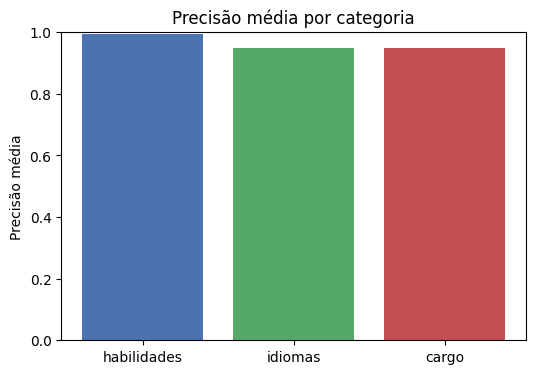

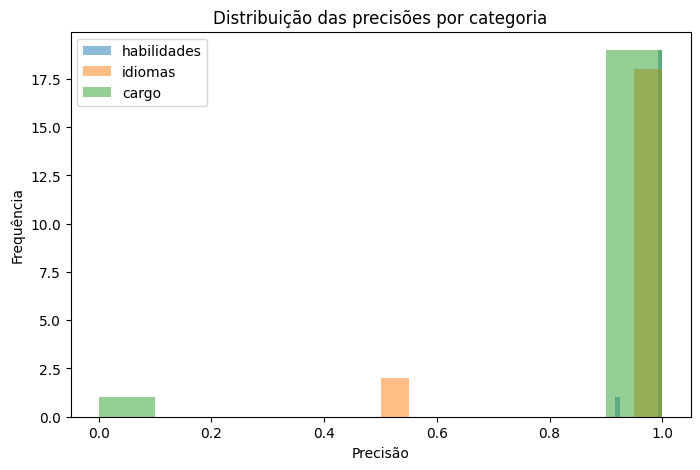

/tmp/ipython-input-2084316350.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_avaliacao['num_habilidades'], df_avaliacao['num_idiomas'], df_avaliacao['num_cargo']], labels=['habilidades','idiomas','cargo'])


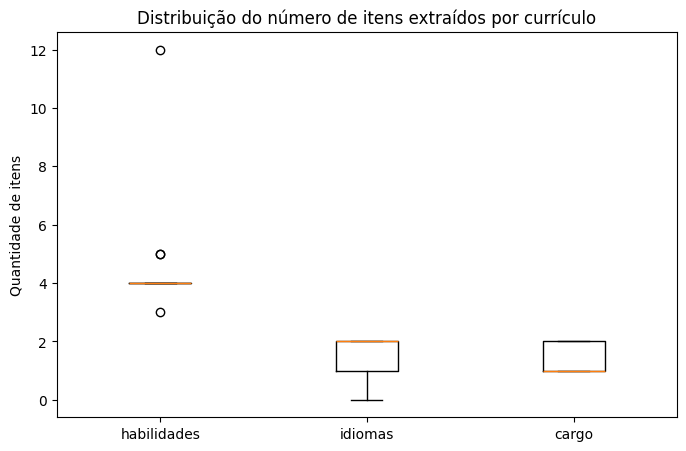

In [16]:
# Cálculo das precisões médias por categoria
media_hab = df_avaliacao['precisao_habilidades'].mean()
media_idi = df_avaliacao['precisao_idiomas'].mean()
media_cargo = df_avaliacao['precisao_cargo'].mean()
print('Precisão média (habilidades):', media_hab)
print('Precisão média (idiomas):', media_idi)
print('Precisão média (cargo):', media_cargo)

import matplotlib.pyplot as plt

# Gráfico de barras das precisões médias
categorias = ['habilidades', 'idiomas', 'cargo']
medias = [media_hab, media_idi, media_cargo]
plt.figure(figsize=(6,4))
plt.bar(categorias, medias, color=['#4C72B0', '#55A868', '#C44E52'])
plt.ylim(0, 1)
plt.title('Precisão média por categoria')
plt.ylabel('Precisão média')
plt.show()

# Histograma das precisões individuais por categoria
plt.figure(figsize=(8,5))
plt.hist(df_avaliacao['precisao_habilidades'], bins=10, alpha=0.5, label='habilidades')
plt.hist(df_avaliacao['precisao_idiomas'], bins=10, alpha=0.5, label='idiomas')
plt.hist(df_avaliacao['precisao_cargo'], bins=10, alpha=0.5, label='cargo')
plt.title('Distribuição das precisões por categoria')
plt.xlabel('Precisão')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Número de itens extraídos por currículo
df_avaliacao['num_habilidades'] = df_avaliacao['pred_habilidades'].apply(len)
df_avaliacao['num_idiomas'] = df_avaliacao['pred_idiomas'].apply(len)
df_avaliacao['num_cargo'] = df_avaliacao['pred_cargo'].apply(len)
plt.figure(figsize=(8,5))
plt.boxplot([df_avaliacao['num_habilidades'], df_avaliacao['num_idiomas'], df_avaliacao['num_cargo']], labels=['habilidades','idiomas','cargo'])
plt.title('Distribuição do número de itens extraídos por currículo')
plt.ylabel('Quantidade de itens')
plt.show()